In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
CURVE_PATH = r"C:\Users\koenk\Documents\Master_Thesis\Programming\Debugging\experiment_009\Growth_curves/"

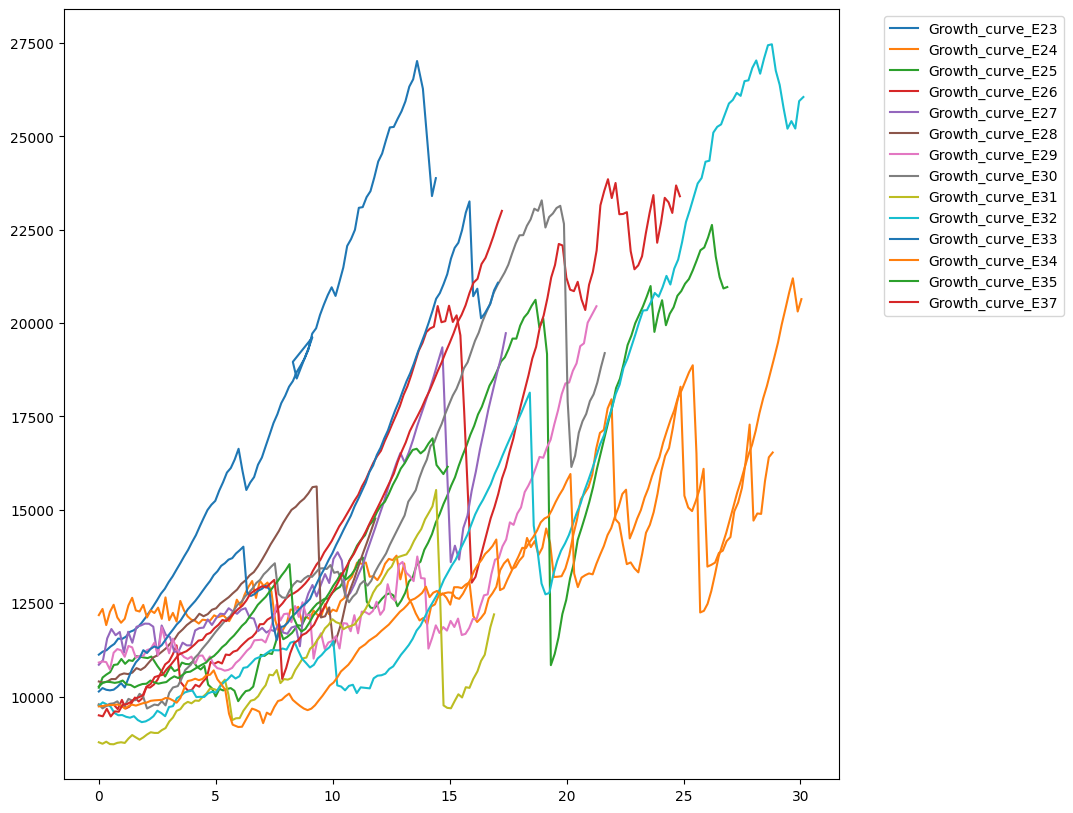

In [4]:
plt.figure(figsize=(10, 10))

for file in os.listdir(CURVE_PATH):
    if file.endswith('.csv') and int(file.split('.')[0][14:]) > 22:
        df = pd.read_csv(CURVE_PATH + file)
        plt.plot(df['time'], df['area'], label=file[:-4])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
example_curve = pd.read_csv(CURVE_PATH + 'Growth_curve_E27.csv')

<Axes: title={'center': 'Growth curve of E32'}, xlabel='Time (h)', ylabel='Area (px^2)'>

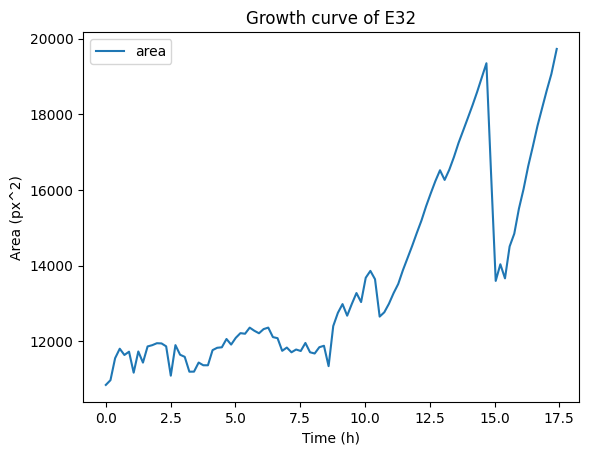

In [6]:
example_curve.plot(x='time', y='area', title='Growth curve of E32', xlabel='Time (h)', ylabel='Area (px^2)')	

<Axes: title={'center': 'Growth curve of E32'}, xlabel='Time (h)', ylabel='Area (px^2)'>

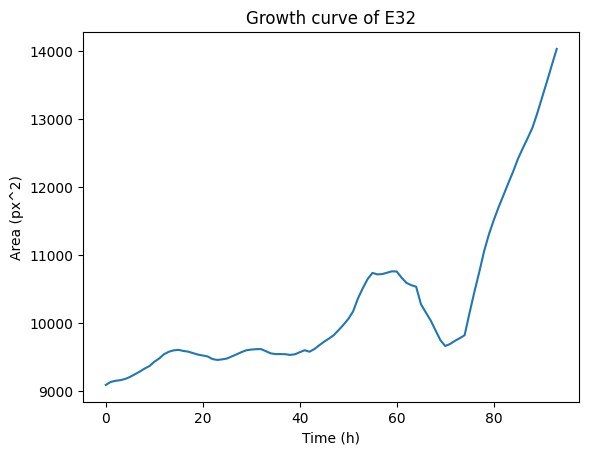

In [142]:
example_curve['area'].rolling(10, min_periods=1).mean().plot(title='Growth curve of E32', xlabel='Time (h)', ylabel='Area (px^2)')

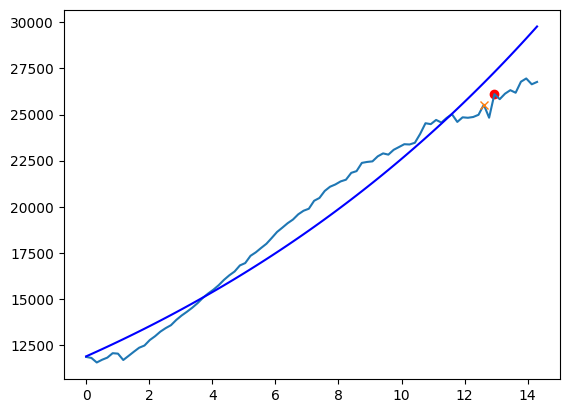

In [36]:
example_curve = pd.read_csv(CURVE_PATH + 'Growth_curve_E7.csv')

i_max = np.argmax(example_curve['area'].diff(), )

# peak analyisis 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# assuming example_curve is a list or numpy array
peaks, _ = find_peaks(example_curve['area'], prominence=500)

plt.plot(example_curve['time'], example_curve['area'])
plt.scatter(example_curve['time'][i_max], example_curve['area'][i_max], c='r')
plt.plot(example_curve['time'][peaks], example_curve['area'][peaks], "x")

# fit exponential curve uusing numpy

a, b = np.polyfit(example_curve['time'], np.log(example_curve['area']), 1)

plt.plot(example_curve['time'], np.exp(b) * np.exp(a * example_curve['time']), 'b-', label='data')

plt.show()


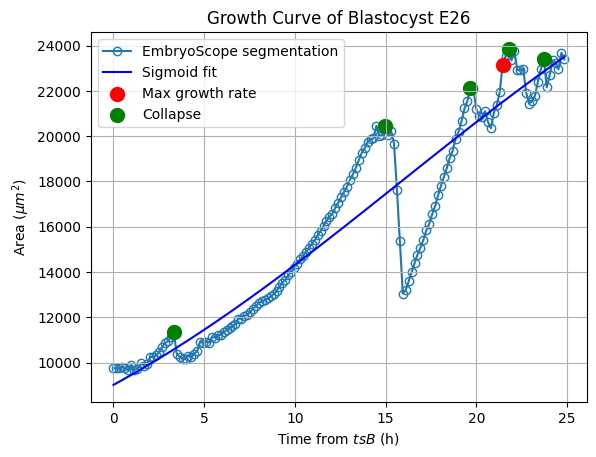

In [194]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

i = 26

example_curve = pd.read_csv(CURVE_PATH + f'Growth_curve_E{i}.csv')

y_data = example_curve['area'].values
x_data = example_curve['time'].values

# assuming x_data and y_data are the coordinates of your data points
p0 = [np.mean(y_data), np.median(x_data),1,min(y_data)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, x_data, y_data,p0, method='dogbox', maxfev=50000)

i_max = np.argmax(example_curve['area'].diff(), )

# peak analyisis 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# assuming example_curve is a list or numpy array
peaks, _ = find_peaks(example_curve['area'], prominence=500)




# sigmoid

plt.title(f'Growth Curve of Blastocyst E{i}')
plt.plot(example_curve['time'], example_curve['area'], 'o-', mfc='none', label='EmbryoScope segmentation', zorder=1)
plt.plot(example_curve['time'], sigmoid(example_curve['time'], *popt), 'b-', label='Sigmoid fit')
plt.scatter(example_curve['time'][i_max], example_curve['area'][i_max], c='r', s=100, label='Max growth rate', zorder=2)
plt.scatter(example_curve['time'][peaks], example_curve['area'][peaks], c='green', marker="o", s=100, label='Collapse')

plt.ylabel('Area ($\mu m^2$)')
plt.xlabel('Time from ${tsB}$ (h)')
plt.legend()
plt.grid()
plt.show()

<Axes: >

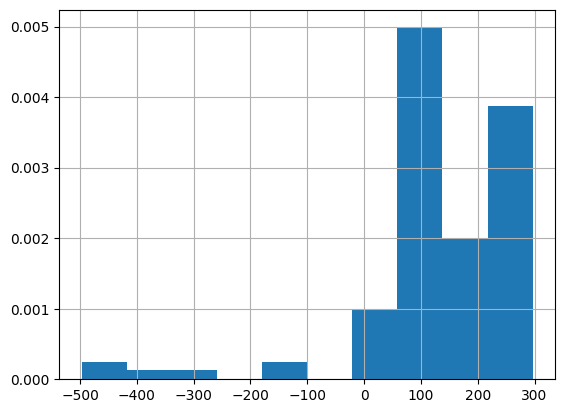

In [193]:
example_curve["area"].rolling(5, min_periods=1).mean().diff().hist(density=True)

<Axes: >

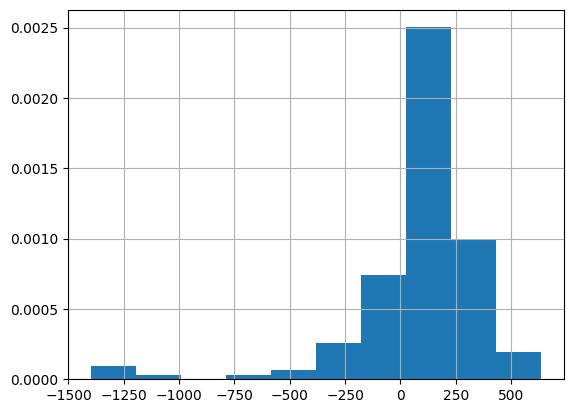

In [196]:
example_curve["area"].rolling(5, min_periods=1).mean().diff().hist(density=True)

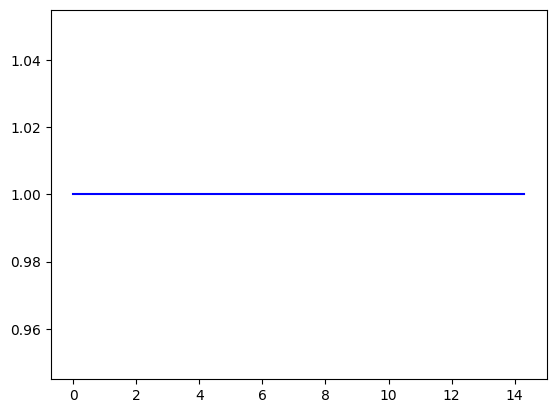

In [40]:
plt.plot(example_curve['time'], sigmoid(example_curve['time'], *popt), 'b-', label='data')

In [46]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

In [48]:
from scipy.optimize import curve_fit

y_data = example_curve['area'].values
x_data = example_curve['time'].values


# assuming x_data and y_data are the coordinates of your data points
p0 = [max(y_data), np.median(x_data),1,min(y_data)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, x_data, y_data,p0, method='dogbox')

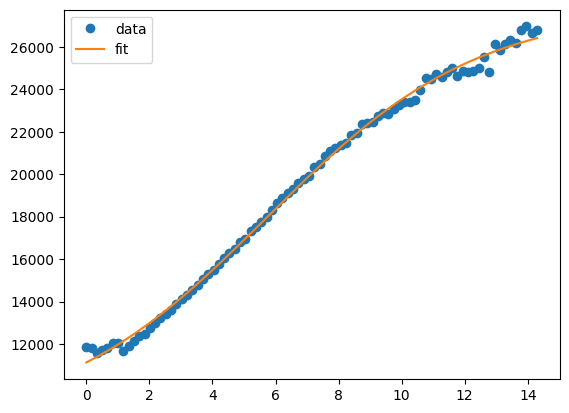

In [51]:
x = np.linspace(0, x_data.max(), 400)
y = sigmoid(x, *popt)

plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x,y, label='fit')
plt.legend(loc='best')
plt.show()

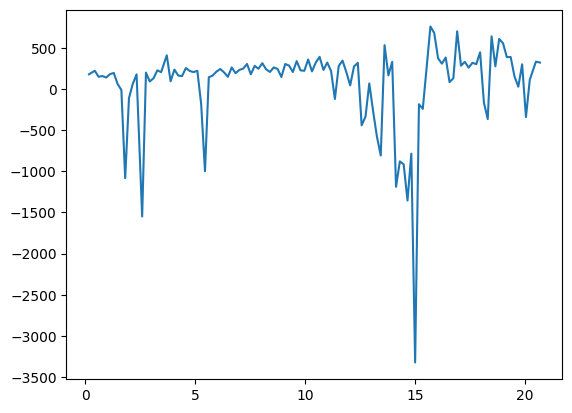

In [15]:
plt.plot(example_curve['time'], example_curve['area'].diff())

In [18]:
np.argmax(example_curve['area'].diff(), )

89

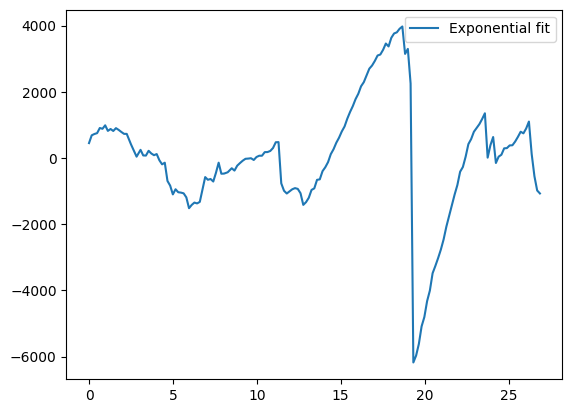

In [27]:
# fit exponential growth curve
from scipy.optimize import curve_fit

def exp_growth(t, a, b, c):
    return a * np.exp(b * t) + c

popt, pcov = curve_fit(exp_growth, example_curve['time'], example_curve['area'])

plt.plot(example_curve['time'], example_curve['area'] - exp_growth(example_curve['time'], *popt), label='Exponential fit')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 10))

for file in os.listdir(CURVE_PATH):
    if file.endswith('.csv') and int(file.split('.')[0][14:]) > 22:
        df = pd.read_csv(CURVE_PATH + file)
        plt.plot(df['time'], df['area'], label=file[:-4])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

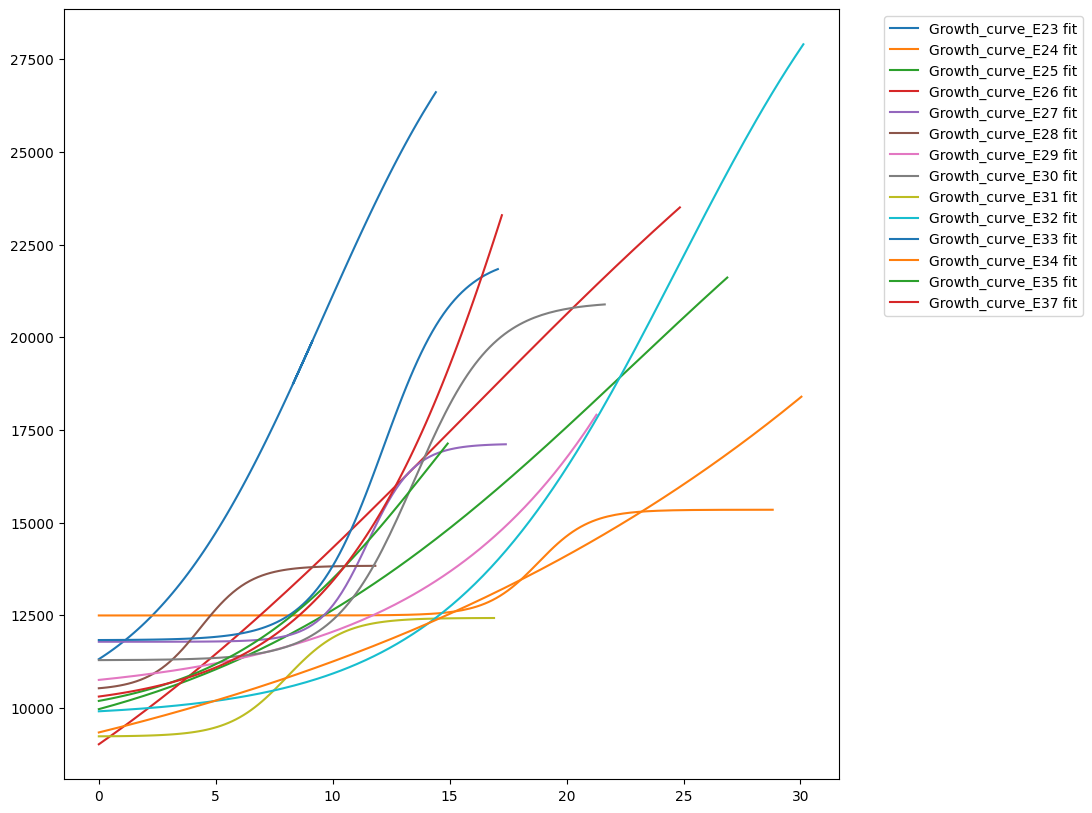

In [118]:
# Define the sigmoid function
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

plt.figure(figsize=(10, 10))

for file in os.listdir(CURVE_PATH):
    if file.endswith('.csv') and int(file.split('.')[0][14:]) > 22:
        df = pd.read_csv(CURVE_PATH + file)
        x_data = df['time']
        y_data = df['area']

        # Fit the sigmoid function to the data
        p0 = [min(y_data), np.median(x_data),1,min(y_data)] # this is an mandatory initial guess
        popt, pcov = curve_fit(sigmoid, x_data, y_data, p0, method='dogbox', maxfev=10000)

        # Generate y-values based on the fit
        y_fit = sigmoid(x_data, *popt)

        # Plot the original data
        # plt.plot(x_data, y_data, 'o', label=file[:-4])

        # Plot the fitted sigmoid function
        plt.plot(x_data, y_fit, label=file[:-4] + ' fit')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()